# Clase 29-07-2021

# Método de Euler 

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def Euler(f, y0, t):
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0, len(t)-1):
        y[n+1] = y[n] + f(y[n], t[n])*(t[n+1] - t[n])
    return y

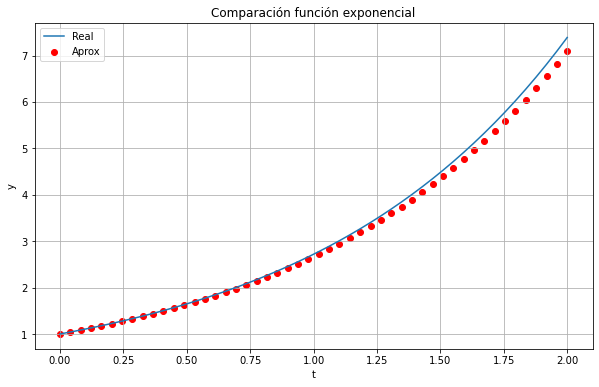

In [31]:
t = np.linspace(0,2,50)
y0 = 1

def f(y,t):
    return y

y = Euler(f, y0, t)
y_real = np.exp(t)

fig , ax = plt.subplots(figsize = [10,6])
ax.scatter(t,y, color = "red",label= "Aprox")
ax.plot(t,y_real, label = "Real")
ax.set_title("Comparación función exponencial")
ax.set_xlabel("t")
ax.set_ylabel("y")
ax.grid()
#ax.legend(["Euler","Aprox"])
ax.legend()
plt.show()

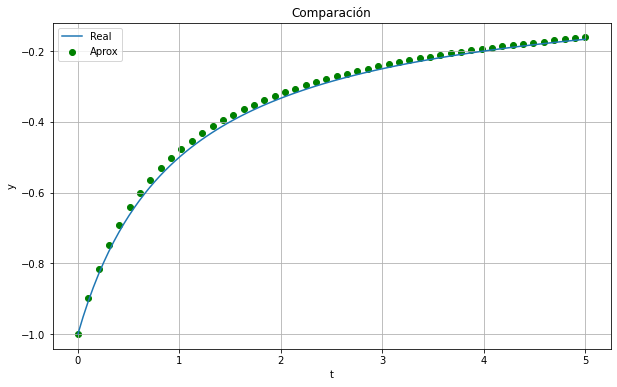

In [38]:
t = np.linspace(0,5,50)
t_real = np.linspace(0,5,100)
y0 = -1 

f = lambda y,t: y**2

y = Euler(f, y0, t)
y_real = (-1)/(t_real +1)

fig , ax = plt.subplots(figsize = [10,6])
ax.scatter(t,y, color = "green",label= "Aprox")
ax.plot(t_real,y_real, label = "Real")
ax.set_title("Comparación")
ax.set_xlabel("t")
ax.set_ylabel("y")
ax.grid()
#ax.legend(["Euler","Aprox"])
ax.legend()
plt.show()

# Método de Runge-Kutta

In [62]:
def rungekutta2(f, y0, t):
    n = len(t)
    y = np.zeros(n)
    y[0] = y0
    for i in range(0, n-1):
        h = t[i+1] - t[i]
        k1 = h*f(y[i], t[i])
        k2 = h*f(y[i] + k1 , t[i] + h)
        y[i+1] = y[i] + (k1 + k2)
    
    return y 

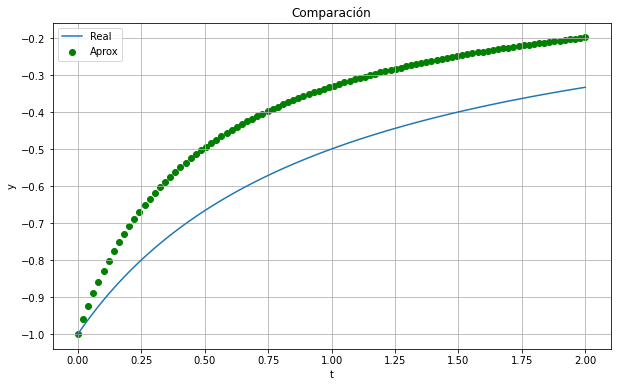

In [63]:
t = np.linspace(0,2,100)
t_real = np.linspace(0,2,100)
y0 = -1 

f = lambda y,t: y**2

y = rungekutta2(f, y0, t)
y_real = (-1)/(t_real + 1)

fig , ax = plt.subplots(figsize = [10,6])
ax.scatter(t, y , color = "green",label= "Aprox")
ax.plot(t_real,y_real, label = "Real")
ax.set_title("Comparación")
ax.set_xlabel("t")
ax.set_ylabel("y")
ax.grid()
#ax.legend(["Euler","Aprox"])
ax.legend()
plt.show()

In [64]:
def rungekutta4(f, y0, t):
    n = len(t)
    y = np.zeros(n)
    y[0] = y0
    for i in range(0, n-1):
        h = t[i+1] - t[i]
        k1 = h*f(y[i], t[i])
        k2 = h*f(y[i] + k1/2, t[i] + h/2)
        k3 = h*f(y[i] + k2/2 , t[i] + h/2)
        k4 = h*f(y[i] + k3 , t[i] + h)
        y[i+1] = y[i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    
    return y     

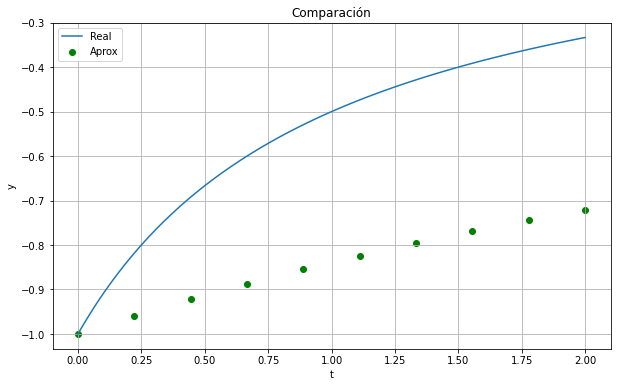

In [65]:
t = np.linspace(0,2,10)
t_real = np.linspace(0,2,100)

y0 = -1 

f = lambda y,t: y**2

y = rungekutta4(f, y0, t)
y_real = (-1)/(t_real +1)

fig , ax = plt.subplots(figsize = [10,6])
ax.scatter(t, y , color = "green",label= "Aprox")
ax.plot(t_real,y_real, label = "Real")
ax.set_title("Comparación")
ax.set_xlabel("t")
ax.set_ylabel("y")
ax.grid()
ax.legend()
plt.show()

In [60]:
from scipy.integrate import odeint 

#Como es la ecuación diferencial
def dy_dx(y,t):
    return t-y

#Intervalo y condiciones iniciales
t = np.linspace(0,5,100)
y0 = 1

ys = odeint(dy_dx, y0, t)

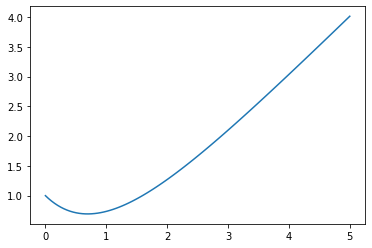

In [61]:
plt.plot(t,ys)

# Clase 05-08-2021

# Sistemas de ecuaciones

In [1]:
import numpy as np

In [6]:
#Se resuleven sistemas de ecuaicones de la forma Ax = b.
A = np.array([[4,3],
              [-5,9]])

b = np.array([20,26])

#Esta es la matriz inversa
inversa = np.linalg.inv(A)

x = np.dot(inversa, b)
x

array([2., 4.])

In [8]:
A = np.array([[4,3,2],
              [-2,2,3],
              [3,-5,2]])

b=np.array([25,-10,-4])

x =np.linalg.inv(A).dot(b)
x

array([ 5.,  3., -2.])

In [10]:
A = np.array([[4,3,2],
              [-2,2,3],
              [3,-5,2]])

b=np.array([25,-10,-4])

np.linalg.solve(A,b)

array([ 5.,  3., -2.])

# Sistemas de ecuaciones no lineales

In [11]:
import numpy as np
from scipy.optimize import fsolve

In [12]:
#Z es un vector de 3 dimensiones
def sistema1(z):
    x = z[0]; y = z[1]; w = z[2]
    F=np.empty((3))
    F[0] = x**2 + y**2-20 
    F[1]=y - x**2
    F[2]=w - x*y + 5
    
    return F

In [13]:
#Así se encuentran los resultados
z_prueba=[1,1,1]
z = fsolve(sistema1,z_prueba)
z

array([2., 4., 3.])

In [15]:
sistema1([2,4,3])

array([0., 0., 0.])

# Sympy

In [16]:
import sympy as sym

In [19]:
#Sistema de impresión 
sym.init_printing()

In [20]:
x,y,z = sym.symbols("x,y,z")

In [21]:
c1 = sym.Symbol("c1")

In [24]:
f = sym.Eq(2*x**2 + y+z, 1)
g = sym.Eq(x + 2*y +z, c1)
h = sym.Eq(-2*x+y,-z)

In [25]:
sym.solve([f,g,h],(x,y,z))

# Sistemas de ecuaciones diferenciales

## Atractor de Lorentz

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint 
#Esto es para graficar en 3D
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#Se define una función con los parámetros deseados
def lorenz(coord,t,a,b,c):
    x = coord[0]; y =coord[1]; z=coord[2]
    #x,y,z=coord, es lo mismo que arriba
    dx =a*(y-x)
    dy =x*(b-z) - y
    dz =x*y-c*z
    return [dx,dy,dz]

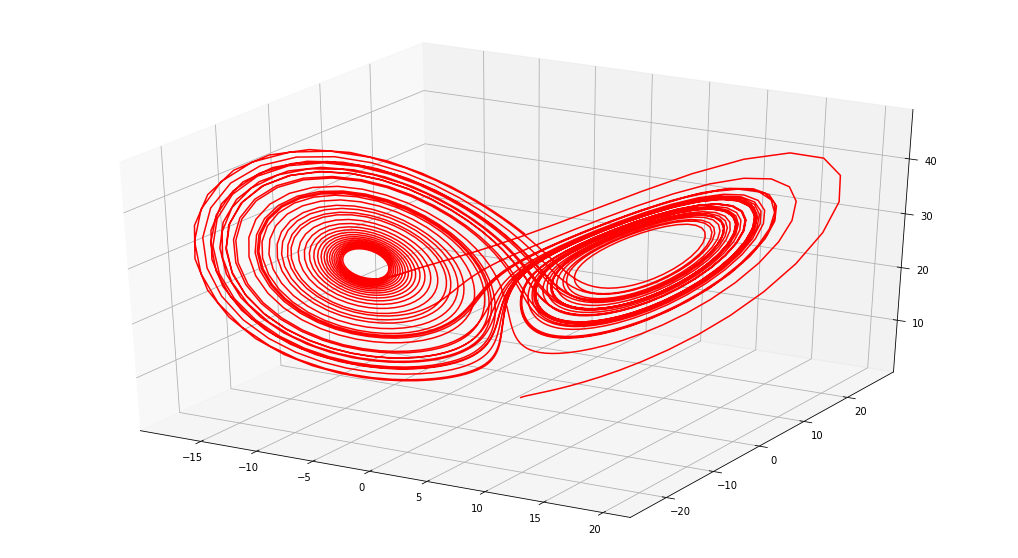

In [13]:
x0 =  [1,1,1]
t=np.linspace(0,50,3000)
params=(10,28,8/3)

result = odeint(lorenz,x0,t,params)

#Se define la figura
fig = plt.figure(figsize=[18,10])
#Este es el comando necesario para poder tener la gráfica en 3D
ax = fig.gca(projection="3d")
#[:,0]=[:][0]
#Se obtiene los resultados en x,y,z
ax.plot(result[:,0], result[:,1], result[:,2], color="Red")

In [10]:
#1000 filas y 3 columnas
result.shape

(3000, 3)

y(0) = 0
y'(0) = 0

$y'' + 2y' + 2y = cos(2t)$ 

Se transforma a 

z(0) = 0

$z = y'$

$z' + 2z + 2y = cos(2t)$

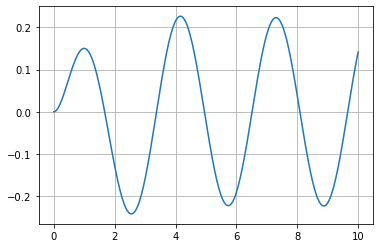

In [19]:
def sistema(coord,x):
    
    y = coord[0]; z = coord[1]
    dy = z 
    dz = np.cos(2*x)-2*z-2*y
    return [dy,dz]


u0 = [0,0]
x = np.linspace(0,10,300)

result = odeint(sistema, u0, x)

plt.plot(x,result[:,0])
plt.grid()

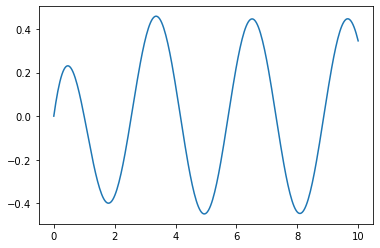

In [20]:
plt.plot(x,result[:,1])

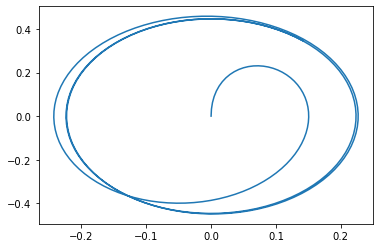

In [22]:
plt.plot(result[:,0], result[:,1])

# Depredador-Presa 

$\dot{x} = x(a - by)$

$\dot{y} = -y(c - d*x)$


In [30]:
def ecosistema(p, t,a,b,c,d):
    x = p[0]; y=p[1]
    dx=x*(a-b*y)
    dy=-y*(c-d*x)
    return[dx,dy]

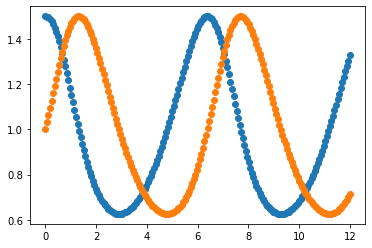

In [40]:
params = (1,1,1,1)
t=np.linspace(0,12,200)
x0 = [1.5,1]
result = odeint(ecosistema,x0,t,params)
#result = odeint(lorenz,x0,t,params)

presas = result[:,0]
depredador = result[:,1]


plt.scatter(t, presas)
plt.scatter(t,depredador)

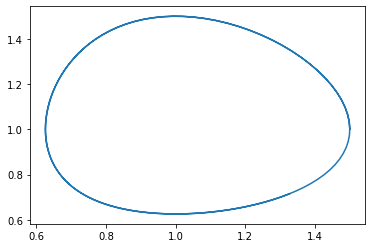

In [41]:
plt.plot(presas, depredador)

Text(0, 0.5, 'Depredador')

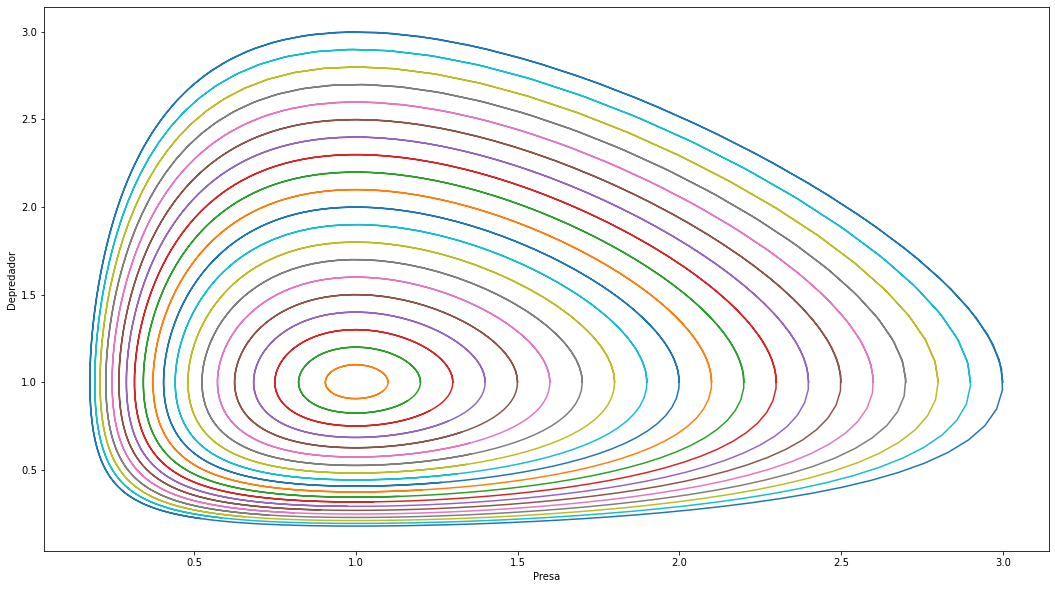

In [44]:
fig = plt.figure(figsize=[18,10])

ic  = np.linspace(1,3,21)
for r in ic:
    p0 = [r,1]
    result = odeint(ecosistema,p0,t,params)
    presas = result[:,0]
    depredador = result[:,1]
    plt.plot(presas, depredador)
plt.xlabel("Presa")
plt.ylabel("Depredador")    